# Prediction of leaderboard score (R)

In [6]:
score_data = read.csv('../input/scores.csv',stringsAsFactors=FALSE)
score_data[with(score_data, order(leaderboard_score)), ]

,model,leaderboard_score,accuracy,logloss,AUC,f1,mu,std
18,bagged_nolearn,0.4313,0.7813,7.5554,0.5857,0.3152,NA,NA
19,LogisticRegression,0.4411,0.7708,7.9152,0.554,0.2235,0.7601,0.0013
15,voting_ensemble_soft,0.4415,0.7847,7.4355,0.6103,0.38,0.7599,0.0015
21,bagged_logit,0.4442,0.783,7.4954,0.5794,0.2938,0.76,0.0015
3,GradientBoostingClassifier,0.4452,0.7934,7.1356,0.6309,0.4251,0.7538,0.0047
20,LogisticRegressionCV,0.4457,0.783,7.4954,0.5794,0.2938,0.7602,0.0012
24,bagged_scikit_nn,0.4465,0.7986,6.9558,0.674,0.5085,0.7463,0.0065
16,bagged_gbc,0.4527,0.7899,7.2556,0.6137,0.3858,0.7573,0.0037
1,nolearn,0.4566,0.8056,6.7159,0.6711,0.5044,NA,NA
4,ExtraTreesClassifier,0.4729,0.776,7.7353,0.5996,0.3582,0.7526,0.0061


# Model using all variables

In [7]:
lm.fit = lm(leaderboard_score ~ accuracy + logloss + AUC + f1 + mu + std, 
            data      = score_data, 
            na.action = na.omit)

slm.fit = step(lm.fit, direction = "both")
summary(slm.fit)

Start:  AIC=-52.29
leaderboard_score ~ accuracy + logloss + AUC + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- AUC       1  0.013884 0.26791 -53.435
- accuracy  1  0.026560 0.28058 -52.696
- logloss   1  0.026640 0.28066 -52.691
<none>                  0.25402 -52.287
- f1        1  0.034459 0.28848 -52.251
- mu        1  0.075898 0.32992 -50.104
- std       1  0.195022 0.44905 -45.172

Step:  AIC=-53.44
leaderboard_score ~ accuracy + logloss + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- accuracy  1  0.032966 0.30087 -53.578
- logloss   1  0.033250 0.30116 -53.563
<none>                  0.26791 -53.435
+ AUC       1  0.013884 0.25402 -52.287
- mu        1  0.062048 0.32996 -52.102
- f1        1  0.067744 0.33565 -51.828
- std       1  0.186704 0.45461 -46.974

Step:  AIC=-53.58
leaderboard_score ~ logloss + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- logloss   1   0.03821 0.33909 -53.665
<none>                  0.30087 -53.578
+ accuracy  1   0.03


Call:
lm(formula = leaderboard_score ~ mu + std, data = score_data, 
    na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19593 -0.05939 -0.04488  0.00603  0.42108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.602      3.271   7.827 2.84e-06 ***
mu           -32.920      4.306  -7.645 3.66e-06 ***
std          -60.331      8.667  -6.961 9.90e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.165 on 13 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.8211,	Adjusted R-squared:  0.7936 
F-statistic: 29.84 on 2 and 13 DF,  p-value: 1.386e-05


# Plot Predicted Scores vs Actual Leaderboard Scores

In [27]:
predictions = c()
models = c()
scores = c()
for (i in 1:nrow(score_data)) {
    if (is.na(score_data[i,'std'])) {next}
    if (score_data[i,'model']=='RandomForestClassifier     ') {next} # a far outlier
    if (score_data[i,'model']=='KNeighborsClassifier       ') {next} # a far outlier
    #print(paste0("|",score_data[i,'model'],"|"))
    
    models = c(models, score_data[i,'model'])
    scores = c(scores, score_data[i,'leaderboard_score'])
    
    accuracy = score_data[i,'accuracy']
    logloss  = score_data[i,'logloss']
    AUC      = score_data[i,'AUC']
    f1       = score_data[i,'f1']
    mu       = score_data[i,'mu']
    std      = score_data[i,'std']
    predictions = c(predictions, round(predict(object=slm.fit,
                                 newdata  = data.frame(accuracy,logloss,AUC,f1,mu,std)),4))
}
pred_v_act = data.frame(models,scores,predictions)
pred_v_act

,models,scores,predictions
1,LogisticRegression,0.4411,0.5019
2,voting_ensemble_soft,0.4415,0.4964
3,bagged_logit,0.4442,0.4931
4,GradientBoostingClassifier,0.4452,0.5041
5,LogisticRegressionCV,0.4457,0.5046
6,bagged_scikit_nn,0.4465,0.6424
7,bagged_gbc,0.4527,0.4492
8,ExtraTreesClassifier,0.4729,0.4592
9,XGBClassifier,0.4851,0.6062
10,BaggingClassifier,0.4885,0.5294


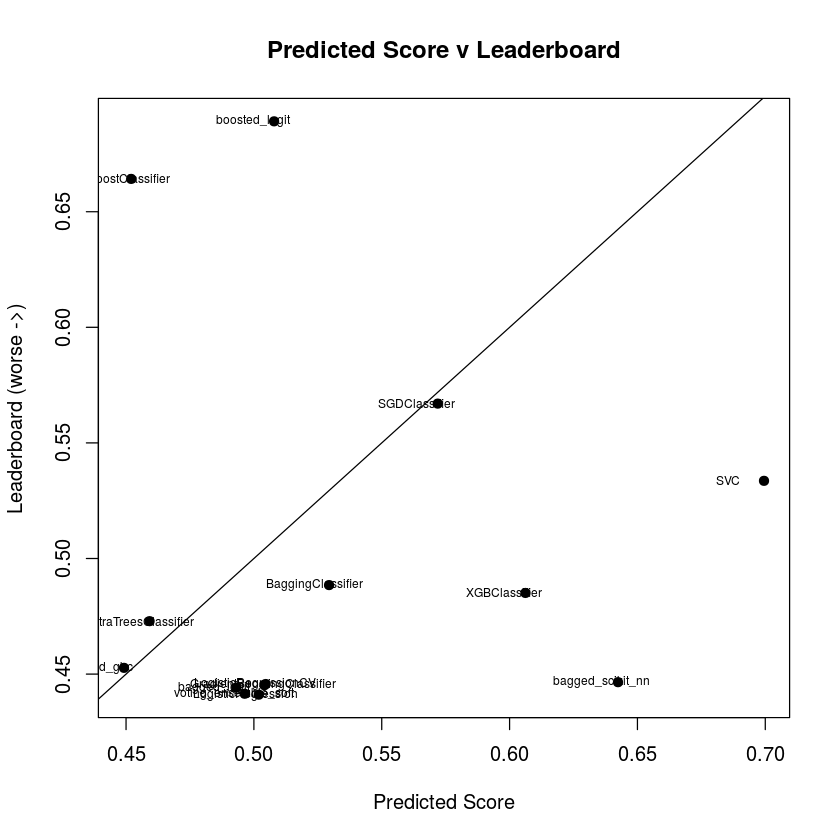

In [37]:
#par(pin=c(6,6))
library(car)
plot(pred_v_act[,'predictions'], pred_v_act[,'scores'], main="Predicted Score v Leaderboard", 
    ylab="Leaderboard (worse ->)", xlab="Predicted Score", pch=19)#, xlim=c(0.25,1.8),ylim=c(0.25,1.8))
text(pred_v_act[,'predictions'], pred_v_act[,'scores'], labels=models, cex= 0.6)
abline(coef=c(0,1))


In [10]:
score_data = score_data[with(score_data, order(leaderboard_score)), ]

library(knitr)
foo = kable(score_data, format = "markdown", digits = 4)
foof = ''
for (i in 1:length(foo)) {
    subs = substr(foo[i],5,52)
    foof = cat(foof,cat(subs,'\n'))
}
foof

|model                      | leaderboard_score| 
|:--------------------------|-----------------:| 
|bagged_nolearn             |            0.4313| 
|LogisticRegression         |            0.4411| 
|voting_ensemble_soft       |            0.4415| 
|bagged_logit               |            0.4442| 
|GradientBoostingClassifier |            0.4452| 
|LogisticRegressionCV       |            0.4457| 
|bagged_scikit_nn           |            0.4465| 
|bagged_gbc                 |            0.4527| 
|nolearn                    |            0.4566| 
|ExtraTreesClassifier       |            0.4729| 
|XGBClassifier              |            0.4851| 
|BaggingClassifier          |            0.4885| 
|ensemble of averages       |            0.4896| 
|SVC                        |            0.5336| 
|SGDClassifier              |            0.5670| 
|cosine_similarity          |            0.5732| 
|KMeans                     |            0.6289| 
|AdaBoostClassifier         |            0.6642| 


NULL